In [49]:
import numpy as np


class TSNE:
    def __init__(self, n_components=2, perplexity=30,iterations=15000, learning_rate=100):
        self.n_components = n_components
        self.learning_rate = learning_rate
        self.perplexity = perplexity
        self.iterations = iterations
        
    
    def fit(self, x):
        distances = np.linalg.norm(x[np.newaxis, :] - x[:, np.newaxis], axis=-1)
        P_i_j = np.exp(-distances ** 2 / (2 * (self.perplexity ** 2)))
        np.fill_diagonal(P_i_j, 0)
        P_i_j /= P_i_j.sum()  

        Y = np.random.randn(x.shape[0], self.n_components)

        for i in range(self.iterations):
            Q_i_j = self.kernel_dist(Y)
            dev_y = self.gradient(P_i_j, Q_i_j, Y)
            Y -= self.learning_rate * dev_y

        return Y
        
    def kernel_dist(self, Y):
        distances = np.linalg.norm(Y[np.newaxis, :] - Y[:, np.newaxis], axis=-1)
        kernel = 1 / (1 + distances ** 2)
        np.fill_diagonal(kernel, 0)  
        return kernel / kernel.sum()
    
    def gradient(self, p, q, y):
        
        dev_y = np.zeros_like(y)

        for i in range(p.shape[0]):
            y_dist = y[i] - y
            squared = np.sum(y_dist ** 2, axis=1)
            t_distr = 1.0 / (1 + squared)

            dev_y[i] = 4.0 * np.sum((p[i, :]-q[i,:]) * t_distr * y_dist.T, axis=1)

        return dev_y


In [50]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [51]:
x,y=load_iris(return_X_y=True)

In [52]:
model=TSNE()
a=model.fit(x)

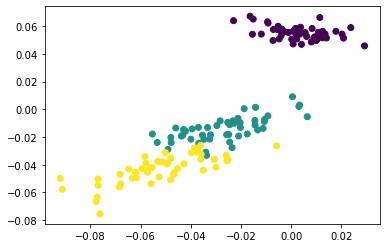

In [53]:
plt.scatter(a[:,0],a[:,1],c=y)